In [1]:
import re
import emoji
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math

# Create an empty list to store words with repeating letters

def get_words_with_repeated_letters(file_name, text_column):
    df = pd.read_csv(file_name)
    words_with_repeating_letters = []
    # Loop through each row in the DataFrame
    for index, row in df.iterrows():
        # Loop through each word in the sentence
        for word in row[text_column].split():
            # Check if the word contains repeating letters
            if re.search(r'(\w)\1{2,}', word):
                # Add the word to the list
                words_with_repeating_letters.append(word)

def show_word_cloud(dataset, text_column):
    repeating_words = []
    for text in dataset[text_column]:
        if not isinstance(text, str):
            continue
        # print(type(text))
        no_emojis = emoji.replace_emoji(text)
        filtered_sentence = re.sub(r'\d+', '', no_emojis)
        # filtered_sentence = re.sub(r'[^a-zA-Z\s]', '', no_emojis)
        # print(filtered_sentence)
        # text = text.decode()
        # filtered_sentence = re.sub(r'\d+', '', text)
        # sentence = re.sub(r'[^\w\s]', '', re.sub(r'\d+', '', text))
        # print(text)
        words = filtered_sentence.split()
        for word in words:
            if re.match(r'\b\w*(\w)\1{2,}\w*\b', word):
            # if re.search(r'(\w)\1{2,}', word):
                repeating_words.append(word)

    # combine repeating words into a single string
    text = ' '.join(repeating_words)

    # print(text)
    # generate word cloud
    wordcloud = WordCloud(width=1200, height=1200, background_color='white',
                          min_font_size=10).generate(text)
    # plot word cloud
    plt.figure(figsize=(12, 12), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

  Using cached emoji-2.2.0-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [17]:
data = pd.read_csv("Datasets/IMDB Dataset.csv")
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


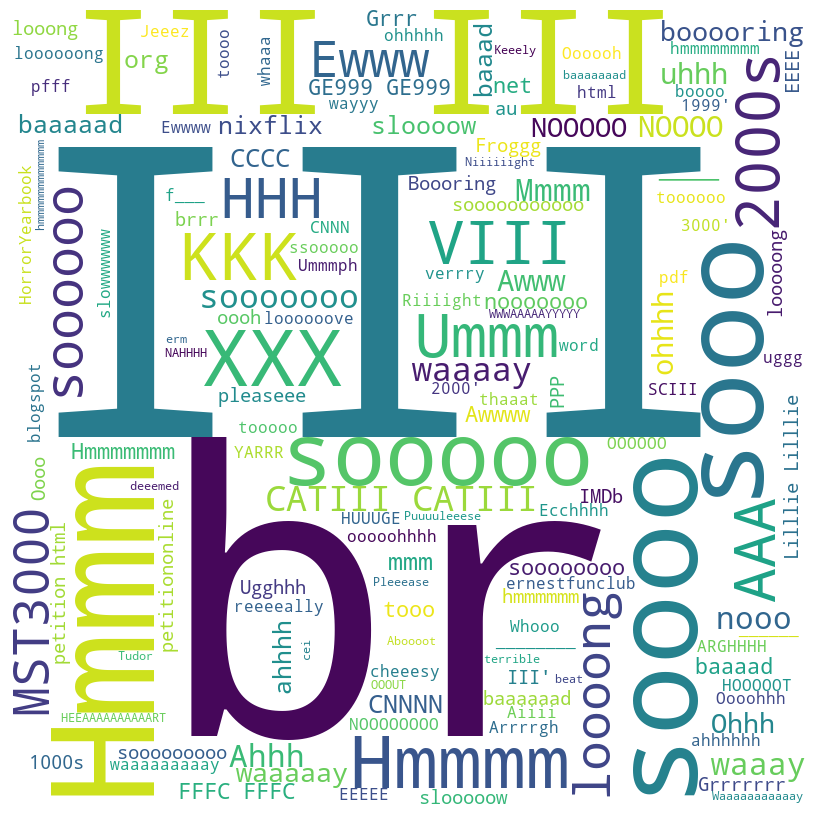

In [18]:
show_word_cloud(data, "review")


In [4]:
data = pd.read_csv("Datasets/Amazon_Reviews_Basic.csv")
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [12]:

# Load the dataset
df = data

# Define a function to check if a string contains emojis
def contains_emoji(s):
    if isinstance(s, str):
        if emoji.emoji_count(s) > 0:
            return True
        return False
    return False

# Filter the dataframe to only include rows where the review contains emojis
df_with_emojis = df[df['reviews'].apply(contains_emoji) == True]
df_with_emojis.to_csv("reviews_with_emojis.csv")

# Group the filtered dataframe by product ID and concatenate the reviews
# reviews_by_product = df_with_emojis.groupby('ProductId')['Text'].apply(lambda x: ' '.join(x))
# reviews_by_product.to_csv('reviews_with_emojis.csv', header=['review'], index_label='productID')

# Print the results

In [3]:
df = pd.read_csv("reviews_with_emojis_amazon_apparel.csv")
df.head()


,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,47,US,10012042,R1H977N2YSYWU5,B014EQRMVK,190205978,ANGVNS Women's Short Sleeve Off Shoulder White...,Apparel,5.0,2.0,3.0,N,N,Five Stars,Love love love this shirt 😀 fits good and com...,2015-08-27
1,251,US,20267251,RZFXMQG74CPNK,B013WR6PP6,724041917,Zonars Women's Side Slit Beach Mini T Shirt Dr...,Apparel,1.0,0.0,0.0,N,Y,"The material is like spandex, not jersey like",Do not waistttttttttttt your money. This is th...,2015-08-16
2,483,US,24476876,R2BW5G0KV3JLN2,B013MK0GVC,11485117,Fresh Tees Black And White Tuxedo With Bowtie ...,Apparel,5.0,0.0,1.0,N,N,Standing ovation for the tuxedo t-shirt provid...,[[ASIN:B013MK0GVC Fresh Tees® Black And White ...,2015-08-18
3,531,US,19682470,R172TTXWIQGPI6,B013LJR3HY,846146826,MUXXN Women's 1950s Retro Vintage Cap Sleeve P...,Apparel,2.0,0.0,0.0,N,N,Dress for wedding,"Beautiful color, nice look, runs 2 sizes to sm...",2015-08-26
4,547,US,49523782,R2QBS51T663H3T,B013KX47S4,72679411,Mission Belt Strap,Apparel,5.0,0.0,0.0,N,N,(live video test) Coolest belt ever. Fits like...,[[VIDEOID:53b2db124969d55f8671f24e58b2352]] UP...,2015-08-26


In [4]:
df['product_id'].value_counts()


B00CONNGVQ    15
B00ECIYWA0    14
B00CONNILE    14
B00CONNDGO    12
B00LLIVQM6    12
              ..
B00MA6CUWS     1
B00MA6742O     1
B00MA672KS     1
B00MA3TD0S     1
B00JAMUYLE     1
Name: product_id, Length: 17169, dtype: int64

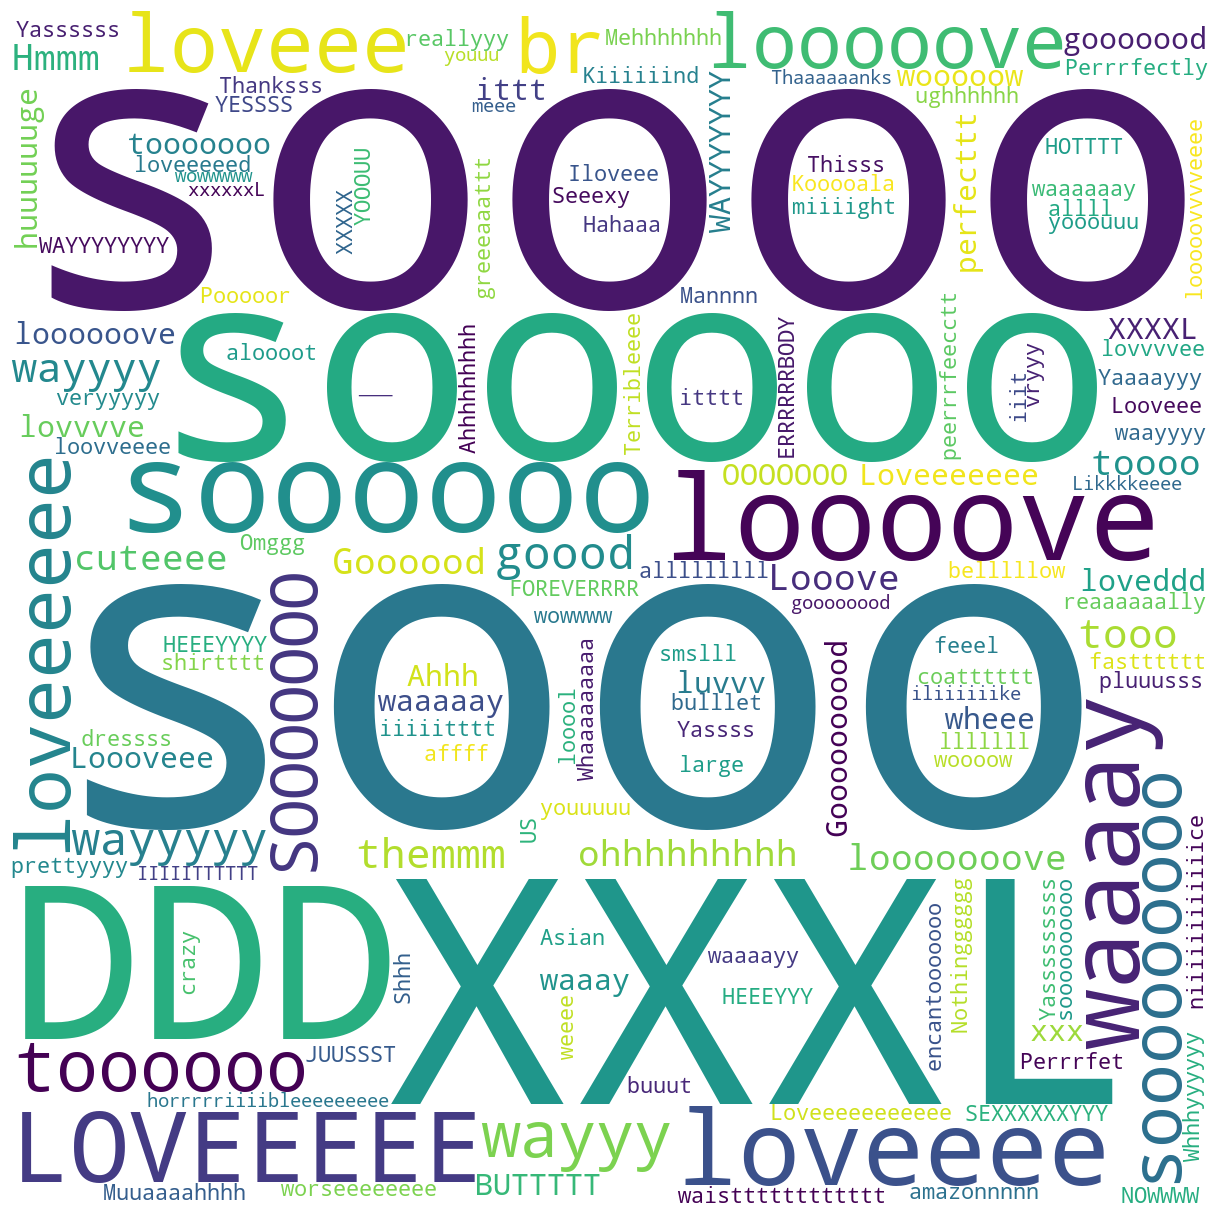

In [5]:
show_word_cloud(df, "review_body")

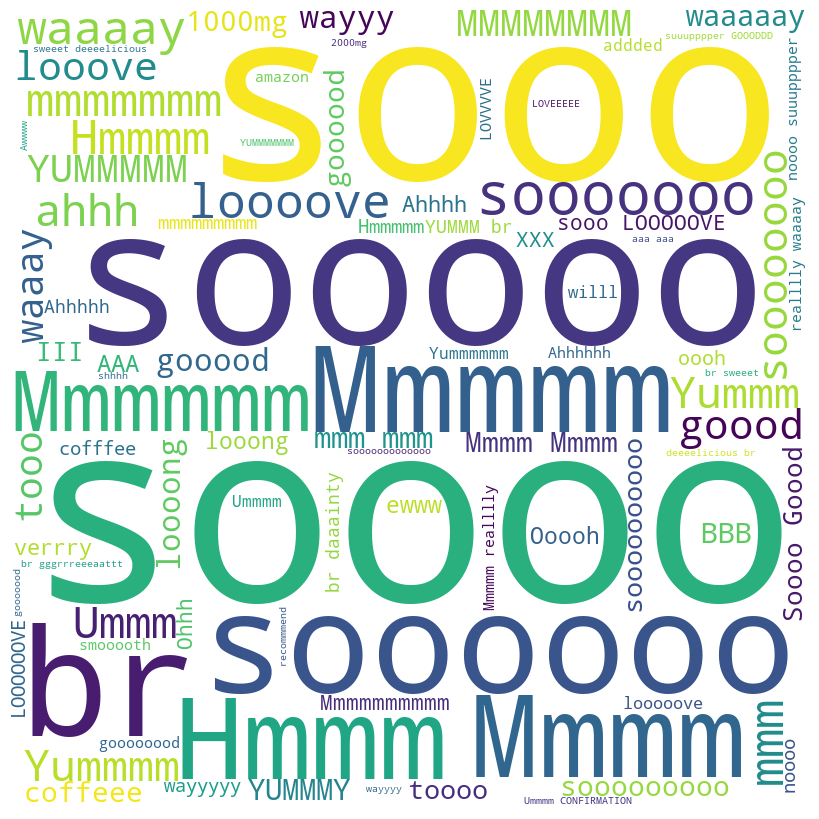

In [20]:
show_word_cloud(data, "Text")

In [26]:
data = pd.read_csv("Datasets/sentiment140.csv", encoding="latin")
data.columns = ['target', 'tweet_id', 'time', 'flag', 'user', 'text']
data

,target,tweet_id,time,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


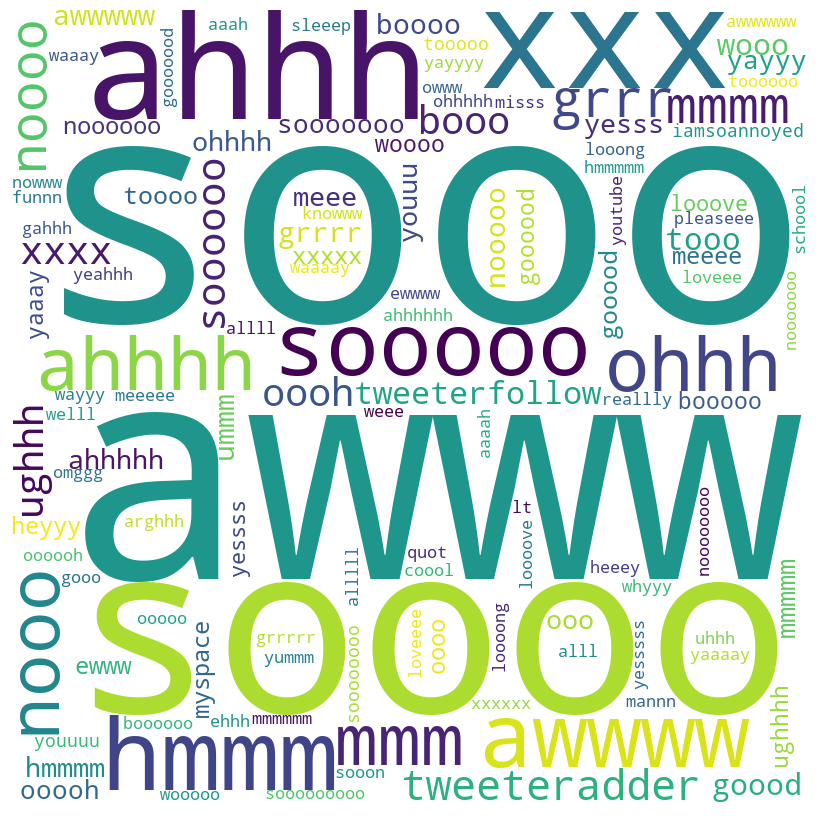

In [27]:
show_word_cloud(data, "text")

In [13]:
data = pd.read_table("Datasets/amazon_reviews_us_Apparel_v1_00.tsv/amazon_reviews_us_Apparel_v1_00.tsv", on_bad_lines='skip')
data

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,32158956,R1KKOXHNI8MSXU,B01KL6O72Y,24485154,Easy Tool Stainless Steel Fruit Pineapple Core...,Apparel,4.0,0.0,0.0,N,Y,★ THESE REALLY DO WORK GREAT WITH SOME TWEAKING ★,"These Really Do Work Great, But You Do Need To...",2013-01-14
1,US,2714559,R26SP2OPDK4HT7,B01ID3ZS5W,363128556,V28 Women Cowl Neck Knit Stretchable Elasticit...,Apparel,5.0,1.0,2.0,N,Y,Favorite for winter. Very warm!,I love this dress. Absolute favorite for winte...,2014-03-04
2,US,12608825,RWQEDYAX373I1,B01I497BGY,811958549,James Fiallo Men's 12-Pairs Low Cut Athletic S...,Apparel,5.0,0.0,0.0,N,Y,Great Socks for the money.,"Nice socks, great colors, just enough support ...",2015-07-12
3,US,25482800,R231YI7R4GPF6J,B01HDXFZK6,692205728,Belfry Gangster 100% Wool Stain-Resistant Crus...,Apparel,5.0,0.0,0.0,N,Y,Slick hat!,"I bought this for my husband and WOW, this is ...",2015-06-03
4,US,9310286,R3KO3W45DD0L1K,B01G6MBEBY,431150422,JAEDEN Women's Beaded Spaghetti Straps Sexy Lo...,Apparel,5.0,0.0,0.0,N,Y,I would do it again!,Perfect dress and the customer service was awe...,2015-06-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881869,US,41086556,R3638LBLGKMM2S,0000032034,5694699,Adult Ballet Tutu Yellow,Apparel,5.0,0.0,0.0,N,Y,Five Stars,Ok,2015-08-07
5881870,US,20641436,RP5AEIYZM5BUW,0000032034,5694699,Adult Ballet Tutu Yellow,Apparel,5.0,12.0,15.0,N,Y,Tutus,Purchased and wore these tutus for the Portlan...,2013-09-10
5881871,US,46003968,R3PB8K42BMNI40,0000032034,5694699,Adult Ballet Tutu Yellow,Apparel,3.0,0.0,0.0,N,Y,good,"Was kind of long but, had to trim it a bit to ...",2014-11-04
5881872,US,10988987,R2PK1N9NG1JM4C,0000032034,5694699,Adult Ballet Tutu Yellow,Apparel,5.0,0.0,0.0,N,Y,Five Stars,What a spectacular tutu! Very slimming.,2015-06-04


In [38]:
df = data

# Define a function to check if a string contains emojis
def contains_emoji(s):
    if isinstance(s, str):
        if(emoji.emoji_count(s) > 0):
            return True
        return False
        # for c in s:
        #     if c in emoji.UNICODE_EMOJI:
        #         return True
    return False

# Filter the dataframe to only include rows where the review contains emojis
df_with_emojis = df[df['review_body'].apply(contains_emoji) == True]
# Group the filtered dataframe by product ID and concatenate the reviews
# reviews_by_product = df_with_emojis.groupby('product_id')['review_body'].apply(lambda x: ' '.join(x))
df_with_emojis.to_csv('reviews_with_emojis_amazon_apparel.csv')


In [1]:
# emoji.emoji_count("safsajfnjsak njsf njk 😎😍")
import pandas as pd
df2 = pd.read_csv('reviews_with_emojis_amazon_apparel.csv')
df = df2

df2.head()

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,47,US,10012042,R1H977N2YSYWU5,B014EQRMVK,190205978,ANGVNS Women's Short Sleeve Off Shoulder White...,Apparel,5.0,2.0,3.0,N,N,Five Stars,Love love love this shirt 😀 fits good and com...,2015-08-27
1,251,US,20267251,RZFXMQG74CPNK,B013WR6PP6,724041917,Zonars Women's Side Slit Beach Mini T Shirt Dr...,Apparel,1.0,0.0,0.0,N,Y,"The material is like spandex, not jersey like",Do not waistttttttttttt your money. This is th...,2015-08-16
2,483,US,24476876,R2BW5G0KV3JLN2,B013MK0GVC,11485117,Fresh Tees Black And White Tuxedo With Bowtie ...,Apparel,5.0,0.0,1.0,N,N,Standing ovation for the tuxedo t-shirt provid...,[[ASIN:B013MK0GVC Fresh Tees® Black And White ...,2015-08-18
3,531,US,19682470,R172TTXWIQGPI6,B013LJR3HY,846146826,MUXXN Women's 1950s Retro Vintage Cap Sleeve P...,Apparel,2.0,0.0,0.0,N,N,Dress for wedding,"Beautiful color, nice look, runs 2 sizes to sm...",2015-08-26
4,547,US,49523782,R2QBS51T663H3T,B013KX47S4,72679411,Mission Belt Strap,Apparel,5.0,0.0,0.0,N,N,(live video test) Coolest belt ever. Fits like...,[[VIDEOID:53b2db124969d55f8671f24e58b2352]] UP...,2015-08-26


In [14]:
# Get unique values and their count as a dictionary
counts_dict = df['product_id'].value_counts().to_dict()
# Sort the dictionary in descending order by count
uniques_and_counts = dict(sorted(counts_dict.items(), key=lambda x: x[1], reverse=True))
# uniques_and_counts = dict(list(uniques_and_counts.items())[:12])
uniques_and_counts
uniques_and_counts = dict(list(uniques_and_counts.items())[:12])

In [15]:
counts_dict

{'B00CONNGVQ': 7,
 'B00ECIYWA0': 7,
 'B00CONNILE': 7,
 'B00CONNDGO': 7,
 'B00LLIVQM6': 7,
 'B00LLIVQNU': 7,
 'B00P0DQ0EW': 7,
 'B00MVHWDIC': 7,
 'B00KJIVDW2': 7,
 'B00NO4GYU4': 7,
 'B00GBT8QM8': 7,
 'B00N8FJGI6': 7}

In [8]:
result = pd.DataFrame()

for value in uniques_and_counts.keys():
    filtered = df[df['product_id'] == value].head(7)
    result = pd.concat([result, filtered])

# result.to_csv('result_2.csv', index=False)

# result = df[df['product_id'].isin(uniques_and_counts.keys())].head(7)
df = result

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# sia = SentimentIntensityAnalyzer()

# from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

import numpy as np
# df[df['product_id'] == 'B00CONNGVQ']
unique_ids = df['product_id'].unique().tolist()
sentiments = {}

max_reviews_count = min(uniques_and_counts.values())

for index, row in df.iterrows():
    # print(sentiments)
    if row['product_id'] in uniques_and_counts.keys():

        if row['product_id'] in sentiments:
            if 'emoji' in sentiments[row['product_id']]:
                # print(sentiments[row['product_id']]['emoji'].append(1000))
                # sentiments[row['product_id']]['emoji'] =
                sentiments[row['product_id']]['emoji'].append(sia.polarity_scores(row['review_body'])['pos'])
                # print(sentiments[row['product_id']]['emoji'])
            else:
                sentiments[row['product_id']]['emoji'] = [sia.polarity_scores(row['review_body'])['pos']]
                # sentiments[row['product_id']] = sentiments[row['product_id']] + sia.polarity_scores(row['review_body'])['pos']
        else:
            sentiments[row['product_id']] = {'emoji' : [sia.polarity_scores(row['review_body'])['pos']]}

# sentiments

for key, value in sentiments.items():
    # total = sum(value['emoji'])
    # print(f"Total for {key}: {total}")
    mean = np.mean(value['emoji'])
    sentiments[key] = mean
    # print(f"Mean for {key}: {mean}")

dict(sorted(sentiments.items(), key=lambda item: item[1], reverse=True))
sentiments

# df[df['product_id'].isin(['A', 'B'])].groupby('value').head(2)


{'B00CONNGVQ': 0.21028571428571427,
 'B00ECIYWA0': 0.2861428571428571,
 'B00CONNILE': 0.24442857142857147,
 'B00CONNDGO': 0.2702857142857143,
 'B00LLIVQM6': 0.26785714285714285,
 'B00LLIVQNU': 0.3017142857142857,
 'B00P0DQ0EW': 0.20042857142857143,
 'B00MVHWDIC': 0.23800000000000002,
 'B00KJIVDW2': 0.3121428571428571,
 'B00NO4GYU4': 0.30457142857142855,
 'B00GBT8QM8': 0.3568571428571429,
 'B00N8FJGI6': 0.3025714285714286}

In [25]:
sorted_dict = dict(sorted(sentiments.items(), key=lambda item: item[1], reverse=True))
sorted_dict
# [k for k, v in sentiments.items() if v > 0.9]
# sorted_dict

{'B01167QBX0': 1.0,
 'B00VPNY3VS': 1.0,
 'B00UIQZWKY': 1.0,
 'B00UF15LWG': 1.0,
 'B00U8F8TJG': 1.0,
 'B00TP2LRTW': 1.0,
 'B00TL4NQI4': 1.0,
 'B00TIJO492': 1.0,
 'B00THQVBGK': 1.0,
 'B00TEW0QF4': 1.0,
 'B00S605SGC': 1.0,
 'B00RM1P4TM': 1.0,
 'B00RKM5O7U': 1.0,
 'B00RIDR8PM': 1.0,
 'B00R7CJ4DS': 1.0,
 'B00QWZ497C': 1.0,
 'B00QV9I07Y': 1.0,
 'B00QIU73ME': 1.0,
 'B00QG47QXI': 1.0,
 'B00Q02M2IU': 1.0,
 'B00PZVE34S': 1.0,
 'B00PUBBF5I': 1.0,
 'B00PNSZH8Y': 1.0,
 'B00PIKNN3I': 1.0,
 'B00PF30WCI': 1.0,
 'B00PCINOFS': 1.0,
 'B00PAETQCE': 1.0,
 'B00PA75M9C': 1.0,
 'B00P88NAQK': 1.0,
 'B00P71LBQO': 1.0,
 'B00P58UHIC': 1.0,
 'B00P1PFFP4': 1.0,
 'B00OL1RBTC': 1.0,
 'B00OJZNNF6': 1.0,
 'B00ODGCY3S': 1.0,
 'B00O6B1JQS': 1.0,
 'B00NVQUSWU': 1.0,
 'B00NV15244': 1.0,
 'B00NMH2OPC': 1.0,
 'B00NLQMLES': 1.0,
 'B00NKXZWEI': 1.0,
 'B00NISVLZE': 1.0,
 'B00NI7NJ14': 1.0,
 'B00NH6KP4U': 1.0,
 'B00NGUXVDE': 1.0,
 'B00NEHO8H2': 1.0,
 'B00NARZO42': 1.0,
 'B00N8AAK7M': 1.0,
 'B00N2FYNLW': 1.0,
 'B00MUB5SRC': 1.0,


In [24]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
import numpy as np
# df[df['product_id'] == 'B00CONNGVQ']
unique_ids = df['product_id'].unique().tolist()
sentiments = {}

for index, row in df.iterrows():
    # print(sentiments)
    if row['product_id'] in uniques_and_counts.keys():
        if row['product_id'] in sentiments:
            if 'emoji' in sentiments[row['product_id']]:
                # print(sentiments[row['product_id']]['emoji'].append(1000))
                # sentiments[row['product_id']]['emoji'] =
                sentiments[row['product_id']]['emoji'].append(sia.polarity_scores(row['review_body'])['pos'])
                # print(sentiments[row['product_id']]['emoji'])
            else:
                sentiments[row['product_id']]['emoji'] = [sia.polarity_scores(row['review_body'])['pos']]
                # sentiments[row['product_id']] = sentiments[row['product_id']] + sia.polarity_scores(row['review_body'])['pos']
        else:
            sentiments[row['product_id']] = {'emoji' : [sia.polarity_scores(row['review_body'])['pos']]}

# sentiments

for key, value in sentiments.items():
    # total = sum(value['emoji'])
    # print(f"Total for {key}: {total}")
    mean = np.mean(value['emoji'])
    sentiments[key] = mean
    # print(f"Mean for {key}: {mean}")

# dict(sorted(sentiments.items(), key=lambda item: item[1]))
sentiments

{'B01167QBX0': 1.0,
 'B00VPNY3VS': 1.0,
 'B00UIQZWKY': 1.0,
 'B00UF15LWG': 1.0,
 'B00U8F8TJG': 1.0,
 'B00TP2LRTW': 1.0,
 'B00TL4NQI4': 1.0,
 'B00TIJO492': 1.0,
 'B00THQVBGK': 1.0,
 'B00TEW0QF4': 1.0,
 'B00S605SGC': 1.0,
 'B00RM1P4TM': 1.0,
 'B00RKM5O7U': 1.0,
 'B00RIDR8PM': 1.0,
 'B00R7CJ4DS': 1.0,
 'B00QWZ497C': 1.0,
 'B00QV9I07Y': 1.0,
 'B00QIU73ME': 1.0,
 'B00QG47QXI': 1.0,
 'B00Q02M2IU': 1.0,
 'B00PZVE34S': 1.0,
 'B00PUBBF5I': 1.0,
 'B00PNSZH8Y': 1.0,
 'B00PIKNN3I': 1.0,
 'B00PF30WCI': 1.0,
 'B00PCINOFS': 1.0,
 'B00PAETQCE': 1.0,
 'B00PA75M9C': 1.0,
 'B00P88NAQK': 1.0,
 'B00P71LBQO': 1.0,
 'B00P58UHIC': 1.0,
 'B00P1PFFP4': 1.0,
 'B00OL1RBTC': 1.0,
 'B00OJZNNF6': 1.0,
 'B00ODGCY3S': 1.0,
 'B00O6B1JQS': 1.0,
 'B00NVQUSWU': 1.0,
 'B00NV15244': 1.0,
 'B00NMH2OPC': 1.0,
 'B00NLQMLES': 1.0,
 'B00NKXZWEI': 1.0,
 'B00NISVLZE': 1.0,
 'B00NI7NJ14': 1.0,
 'B00NH6KP4U': 1.0,
 'B00NGUXVDE': 1.0,
 'B00NEHO8H2': 1.0,
 'B00NARZO42': 1.0,
 'B00N8AAK7M': 1.0,
 'B00N2FYNLW': 1.0,
 'B00MUB5SRC': 1.0,


In [4]:
df2['product_id'].value_counts()
df = df2
# unq = df['product_id'].value_counts().sort_values(ascending=False).index.tolist()
# unq

In [5]:
df['product_id'].value_counts().sort_values(ascending=False).index.tolist()

['B00CONNGVQ',
 'B00CONNILE',
 'B00ECIYWA0',
 'B00CONNDGO',
 'B00LLIVQM6',
 'B00LLIVQNU',
 'B00P0DQ0EW',
 'B00MVHWDIC',
 'B00KJIVDW2',
 'B00NO4GYU4',
 'B00GBT8QM8',
 'B00N8FJGI6',
 'B00F9RJLTU',
 'B00KFEFJ3O',
 'B00LLIVQSK',
 'B00C2DJ81K',
 'B00UKNRSBG',
 'B00TIC58T4',
 'B00ESMSCWO',
 'B00IQG86ME',
 'B00IPDFCAW',
 'B00P0DPYNA',
 'B00IQG87AU',
 'B00OFRPMTI',
 'B00M4K2A6Q',
 'B00GUBHBRS',
 'B00SAG36DO',
 'B00CKLI6X0',
 'B00JAK6HBW',
 'B00D1R820O',
 'B00422M6FE',
 'B006HFJA12',
 'B00HGMA85M',
 'B00ORZIYBQ',
 'B00G56OYAA',
 'B00GJG91RM',
 'B00E4IV23S',
 'B00IFDBEEA',
 'B009L9BULO',
 'B00D1R84HA',
 'B00VOTS6I4',
 'B00OHCMPWI',
 'B00N9WK14Q',
 'B00IPDFCA2',
 'B00ITJ31V4',
 'B00GQVC4EM',
 'B00JKGCEN6',
 'B002G9UDYG',
 'B00ILA8Q5W',
 'B00KDCBOBE',
 'B00MUDXL1A',
 'B00NQ74M8K',
 'B00IIJFBAO',
 'B00J8PY3J2',
 'B00GN8CH04',
 'B00LMI9A6Y',
 'B00LLIVQK8',
 'B00HLRPQZO',
 'B00FFKZAZU',
 'B00LL3NH9Q',
 'B004M6UDF0',
 'B00M5CV9B0',
 'B00LLIVQJY',
 'B00JS7IFCQ',
 'B00HGAR6JU',
 'B00IGAOCO6',
 'B00P0DQ4

In [6]:
match_values = df['product_id'].value_counts().sort_values(ascending=False).index.tolist()[0:10]
# df[df['product_id'].isin(match_values)].groupby('product_id').apply(lambda x: x.head(10)).reset_index(drop=True)
df = df[df['product_id'].isin(match_values)].groupby('product_id').head(7)

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

df['product_id'].unique().tolist()

# for index, row in df.iterrows():
#     print(row['product_id'])
# sentiment_scores = sia.polarity_scores(text)
# print(sentiment_scores)

['B00P0DQ0EW',
 'B00NO4GYU4',
 'B00MVHWDIC',
 'B00LLIVQNU',
 'B00LLIVQM6',
 'B00KJIVDW2',
 'B00ECIYWA0',
 'B00CONNILE',
 'B00CONNGVQ',
 'B00CONNDGO']

In [51]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# df[df['product_id'] == 'B00CONNGVQ']
unique_ids = df['product_id'].unique().tolist()
sentiments = {}

for index, row in df.iterrows():
    # print(sentiments)
    if row['product_id'] in unique_ids:
        if(row['product_id'] in sentiments):
            if 'emoji' in sentiments[row['product_id']]:
                # print(sentiments[row['product_id']]['emoji'].append(1000))
                # sentiments[row['product_id']]['emoji'] =
                sentiments[row['product_id']]['emoji'].append(sia.polarity_scores(row['review_body'])['pos'])
                # print(sentiments[row['product_id']]['emoji'])
            else:
                sentiments[row['product_id']]['emoji'] = [sia.polarity_scores(row['review_body'])['pos']]
                # sentiments[row['product_id']] = sentiments[row['product_id']] + sia.polarity_scores(row['review_body'])['pos']
        else:
            sentiments[row['product_id']] = {'emoji' : [sia.polarity_scores(row['review_body'])['pos']]}

# sentiments

for key, value in sentiments.items():
    # total = sum(value['emoji'])
    # print(f"Total for {key}: {total}")
    mean = np.mean(value['emoji'])
    sentiments[key] = mean
    # print(f"Mean for {key}: {mean}")
dict(sorted(sentiments.items(), key=lambda item: item[1]))
# sentiments
# df[df['product_id'].isin(['A', 'B'])].groupby('value').head(2)


{'B00P0DQ0EW': 0.20042857142857143,
 'B00CONNGVQ': 0.21028571428571427,
 'B00MVHWDIC': 0.23800000000000002,
 'B00CONNILE': 0.24442857142857147,
 'B00LLIVQM6': 0.26785714285714285,
 'B00CONNDGO': 0.2702857142857143,
 'B00ECIYWA0': 0.2861428571428571,
 'B00LLIVQNU': 0.3017142857142857,
 'B00NO4GYU4': 0.30457142857142855,
 'B00KJIVDW2': 0.3121428571428571}

In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
unique_ids = df['product_id'].unique().tolist()
sentiments ={}

for index, row in df.iterrows():
    # print(sentiments)
    if row['product_id'] in uniques_and_counts:
        if(row['product_id'] in sentiments):
            if 'emoji' in sentiments[row['product_id']]:
                # print(sentiments[row['product_id']]['emoji'].append(1000))
                # sentiments[row['product_id']]['emoji'] =
                sentiments[row['product_id']]['emoji'].append(sia.polarity_scores(row['review_body'])['pos'])
                # print(sentiments[row['product_id']]['emoji'])
            else:
                sentiments[row['product_id']]['emoji'] = [sia.polarity_scores(row['review_body'])['pos']]
                # sentiments[row['product_id']] = sentiments[row['product_id']] + sia.polarity_scores(row['review_body'])['pos']
        else:
            sentiments[row['product_id']] = {'emoji' : [sia.polarity_scores(row['review_body'])['pos']]}


for key, value in sentiments.items():
    # total = sum(value['emoji'])
    # print(f"Total for {key}: {total}")
    mean = np.average(value['emoji'])
    sentiments[key] = mean
    # print(f"Mean for {key}: {mean}")
dict(sorted(sentiments.items(), key=lambda item: item[1], reverse=True))
# sentiments

# unique_ids = df['product_id'].unique().tolist()
# sentiments = {}
#
# for index, row in df.iterrows():
#     if row['product_id'] in unique_ids:
#         if(row['product_id'] in sentiments):
#             sentiments[row['product_id']] = sentiments[row['product_id']] + sia.polarity_scores(row['review_body'])['pos']
#         else:
#             sentiments[row['product_id']] = sia.polarity_scores(row['review_body'])['pos']
#
# dict(sorted(sentiments.items(), key=lambda item: item[1]))

{'B0108KDANA': 1.0,
 'B00Z7F3MBC': 1.0,
 'B00YO9VXBI': 1.0,
 'B00YMNOU5M': 1.0,
 'B00YBSO6D4': 1.0,
 'B00X8F4SQQ': 1.0,
 'B00X5BVSNY': 1.0,
 'B00W81MMDC': 1.0,
 'B00W0XTCD6': 1.0,
 'B00V9EUP5Q': 1.0,
 'B00U8PGOY8': 1.0,
 'B00TS0XZDM': 1.0,
 'B00TL4NQI4': 1.0,
 'B00T4C0XMA': 1.0,
 'B00SKAZ1CO': 1.0,
 'B00SCD4CGK': 1.0,
 'B00S7FQMUW': 1.0,
 'B00ROXN030': 1.0,
 'B00RKM5O7U': 1.0,
 'B00RIDR8PM': 1.0,
 'B00RGY98DS': 1.0,
 'B00QUBY2SO': 1.0,
 'B00Q02M2IU': 1.0,
 'B00PUBBF5I': 1.0,
 'B00PCQNSQ0': 1.0,
 'B00PAPBH48': 1.0,
 'B00P6TLM0M': 1.0,
 'B00P1PFFP4': 1.0,
 'B00P082DNY': 1.0,
 'B00OTSHZ5M': 1.0,
 'B00OM8KMYU': 1.0,
 'B00OKWMKT8': 1.0,
 'B00O9W4SWQ': 1.0,
 'B00NTU7FDI': 1.0,
 'B00NRSKEK8': 1.0,
 'B00NQSHUZQ': 1.0,
 'B00NQCOU50': 1.0,
 'B00NNBTMPW': 1.0,
 'B00NN3KFEM': 1.0,
 'B00NLQMLES': 1.0,
 'B00NJHJYMQ': 1.0,
 'B00NISVLZE': 1.0,
 'B00NI7NJ14': 1.0,
 'B00NBI8M26': 1.0,
 'B00N8AAK7M': 1.0,
 'B00N4T56G2': 1.0,
 'B00MQ1BFGO': 1.0,
 'B00MPSUI52': 1.0,
 'B00MPQD810': 1.0,
 'B00MHNHKHO': 1.0,


In [40]:
people = {3: "Jim", 2: "Jack", 4: "Jane", 1: "Jill"}


TypeError: 'dict' object is not callable

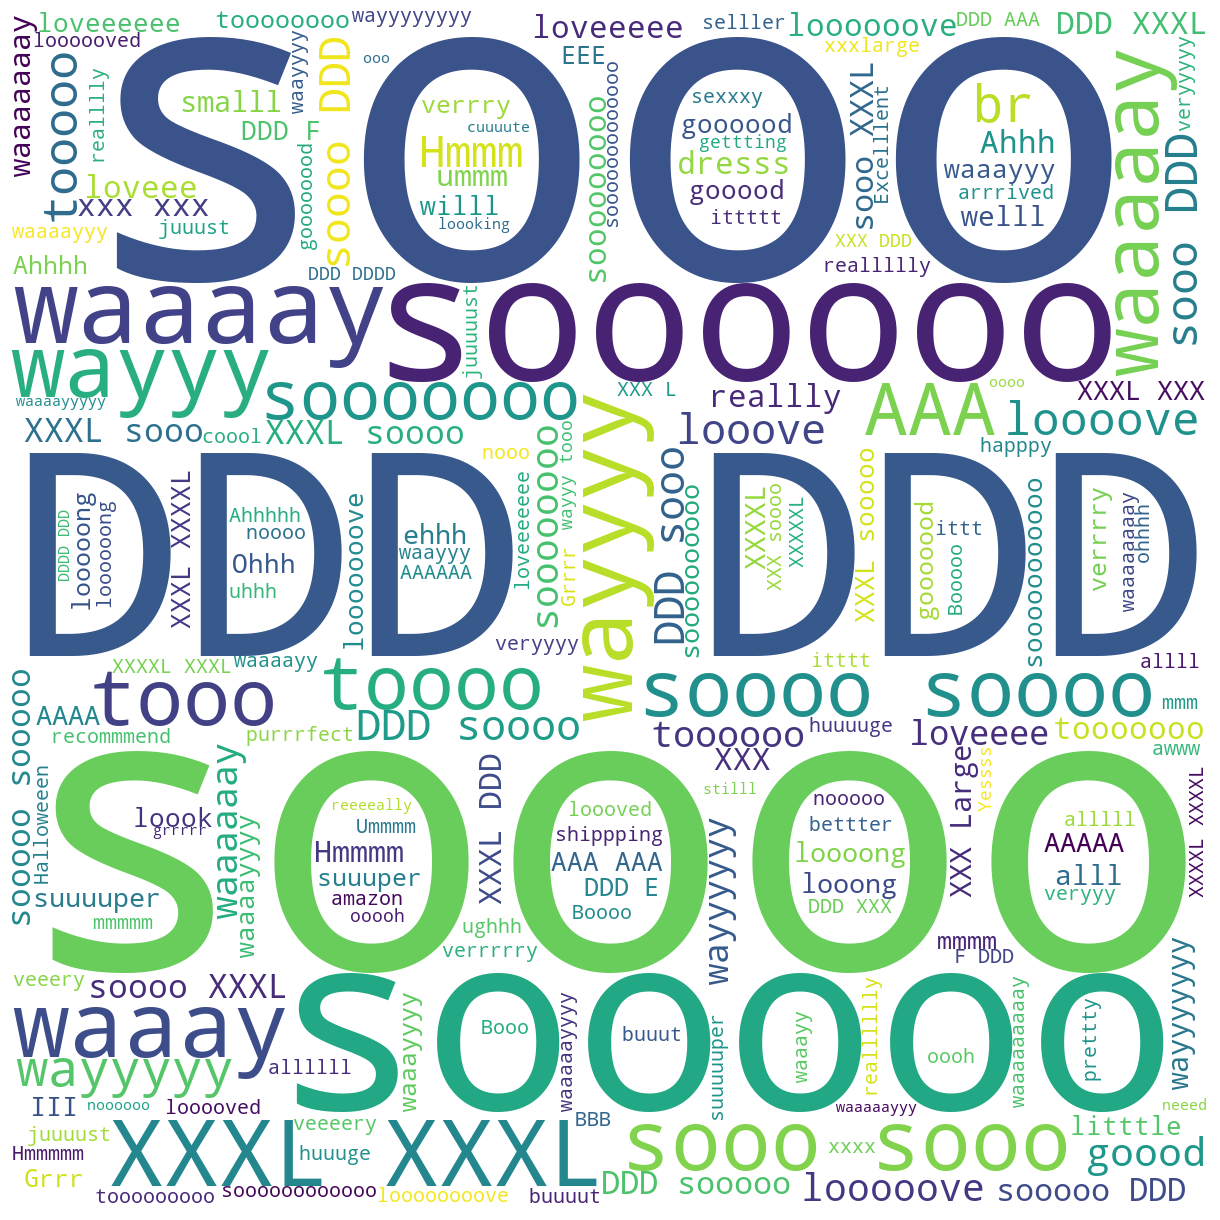

In [36]:
show_word_cloud(data, "review_body")
# data['review_body']

In [37]:
data = pd.read_table("Datasets/amazon_reviews_us_Beauty_v1_00.tsv/amazon_reviews_us_Beauty_v1_00.tsv", on_bad_lines='skip')
data

C:\Users\disur\AppData\Local\Temp\ipykernel_33108\2897349270.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table("Datasets/amazon_reviews_us_Beauty_v1_00.tsv/amazon_reviews_us_Beauty_v1_00.tsv", on_bad_lines='skip')


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,1797882,R3I2DHQBR577SS,B001ANOOOE,2102612,The Naked Bee Vitmin C Moisturizing Sunscreen ...,Beauty,5,0.0,0.0,N,Y,Five Stars,"Love this, excellent sun block!!",2015-08-31
1,US,18381298,R1QNE9NQFJC2Y4,B0016J22EQ,106393691,"Alba Botanica Sunless Tanning Lotion, 4 Ounce",Beauty,5,0.0,0.0,N,Y,Thank you Alba Bontanica!,The great thing about this cream is that it do...,2015-08-31
2,US,19242472,R3LIDG2Q4LJBAO,B00HU6UQAG,375449471,"Elysee Infusion Skin Therapy Elixir, 2oz.",Beauty,5,0.0,0.0,N,Y,Five Stars,"Great Product, I'm 65 years old and this is al...",2015-08-31
3,US,19551372,R3KSZHPAEVPEAL,B002HWS7RM,255651889,"Diane D722 Color, Perm And Conditioner Process...",Beauty,5,0.0,0.0,N,Y,GOOD DEAL!,I use them as shower caps & conditioning caps....,2015-08-31
4,US,14802407,RAI2OIG50KZ43,B00SM99KWU,116158747,Biore UV Aqua Rich Watery Essence SPF50+/PA+++...,Beauty,5,0.0,0.0,N,Y,this soaks in quick and provides a nice base f...,This is my go-to daily sunblock. It leaves no ...,2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5094302,US,50113639,RZ7RZ02MTP4SL,B000050B70,185454094,Conair NE150NSCS Cordless Nose and Ear Hair Tr...,Beauty,5,10.0,10.0,N,N,Great Little Grooming Tool,After watching my Dad struggle with his scisso...,2000-11-12
5094303,US,52940456,R2IRC0IZ8YCE5T,B000050FF2,678848064,Homedics Envirascape Sound Spa Alarm Clock Radio,Beauty,3,23.0,23.0,N,N,Not bad for the price,"Like most sound machines, the sounds choices a...",2000-11-07
5094304,US,47587881,R1U4ZSXOD228CZ,B000050B6U,862195513,Conair Instant Heat Curling Iron,Beauty,5,89.0,97.0,N,N,Best Curling Iron Ever,I bought this product because it indicated 30 ...,2000-11-02
5094305,US,53047750,R3SFJLZE09URWM,B000050FDE,195242894,Oral-B Professional Care 1000 Power Toothbrush,Beauty,5,10.0,10.0,N,N,"The best electric toothbrush ever, REALLY!",We have used Oral-B products for 15 years; thi...,2000-11-01


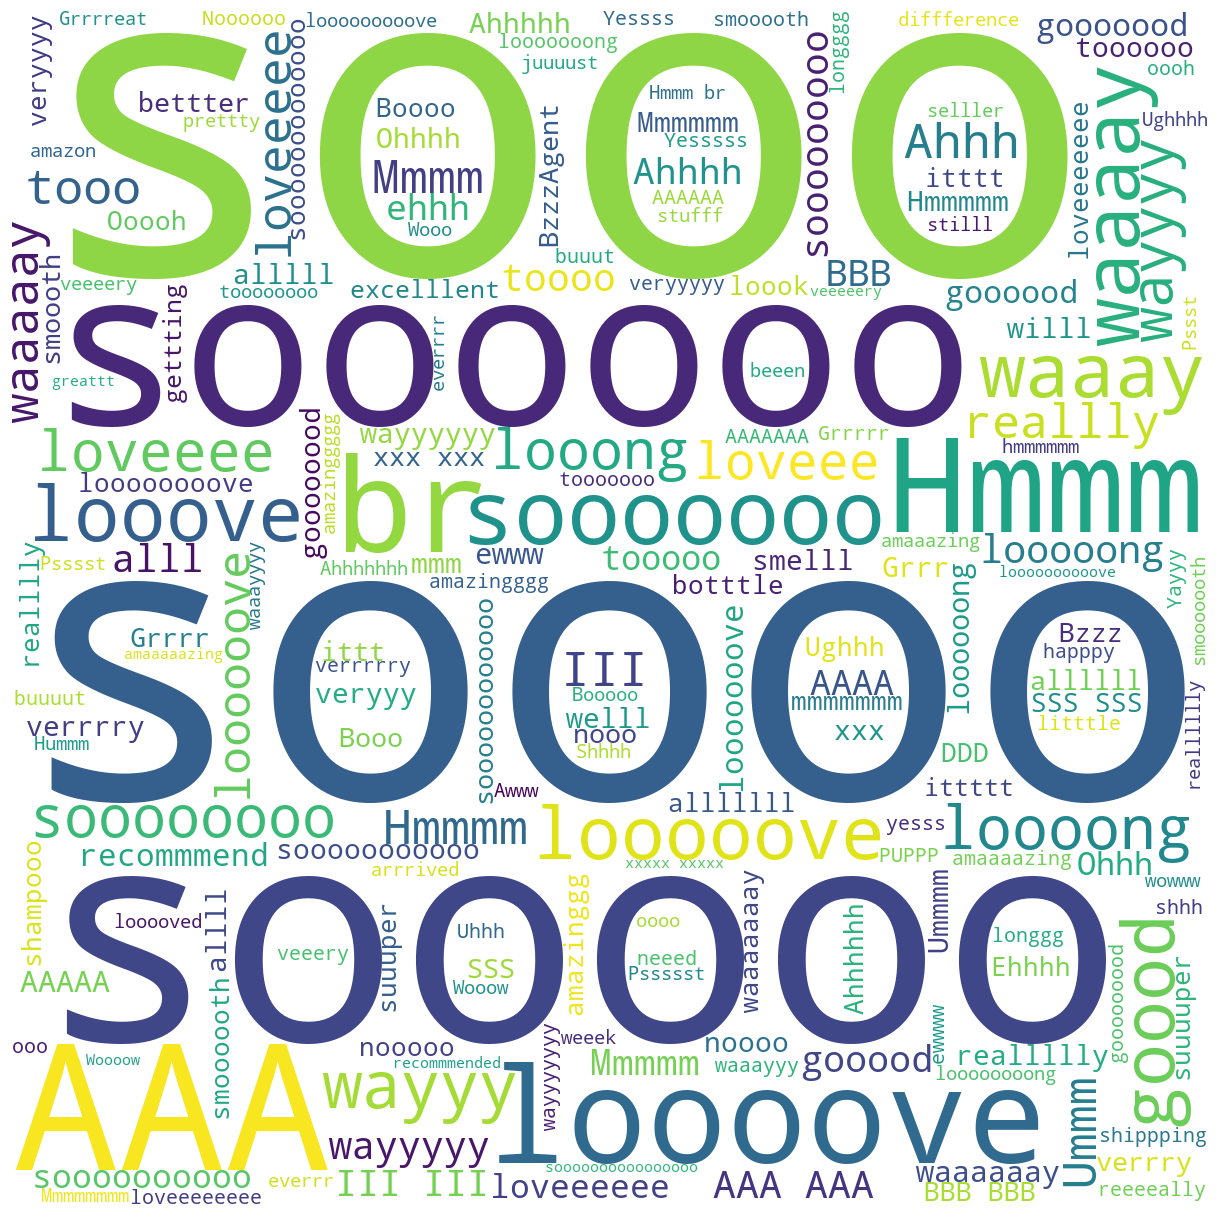

In [38]:
show_word_cloud(data, "review_body")


In [39]:
data = pd.read_table("Datasets/amazon_reviews_us_Shoes_v1_00.tsv/amazon_reviews_us_Shoes_v1_00.tsv", on_bad_lines='skip')
data

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,18069663,R3P2HIOQCIN5ZU,B000XB31C0,265024781,Minnetonka Men's Double Deerskin Softsole Mocc...,Shoes,1,0,0,N,Y,.,Do not buy: really didn't start to wear them u...,2015-08-31
1,US,16251825,R12VVR0WH5Q24V,B00CFYZH5W,259035853,Teva Men's Pajaro Flip-Flop,Shoes,5,0,0,N,Y,super flip flop,provides great cushion as well as archsupport,2015-08-31
2,US,20381037,RNCCKB6TV5EEF,B00S8JNN3Q,666066660,Anne Klein Perfect Pair Wristlet,Shoes,4,0,0,N,Y,Great clutch purse!,It's perfect if you need something small for c...,2015-08-31
3,US,108364,R2NZXYIVCGB13W,B00XFBPOQG,448483263,adidas Men's 10K Lifestyle Runner Sneaker,Shoes,5,0,6,N,Y,Badass,Getting what u see,2015-08-31
4,US,45449350,R2EQ1TG9IT3OEQ,B00SW64Y9W,7853171,OverBling Sneakers for Men Casual Men Shoes Ge...,Shoes,3,0,0,N,Y,Three Stars,small,2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358815,US,49734568,R2C0JM229QZS0R,B000035X8T,249415522,Fox Men's Featherlite Shoe Lace-Up,Shoes,4,1,6,N,N,Get it All,If you are a fan of &quot;extreme sports&quot;...,2000-04-07
4358816,US,51790352,R3CBWUG8E05BFU,B00000J067,125201678,Floor Spinner,Shoes,1,5,5,N,N,Looks can be deceiving,This toy has gotten rave reviews from adults b...,2000-01-27
4358817,US,50804984,RN7TB51V24XHT,B00000J067,125201678,Floor Spinner,Shoes,4,7,7,N,N,My seven month old loves this toy!,My seven month old son loves to watch me shake...,1999-12-03
4358818,US,50704055,R22CRGBKA02SPB,B00000J067,125201678,Floor Spinner,Shoes,5,3,3,N,N,What a wonderful toy!,All three of my children have enjoyed watching...,1999-12-01


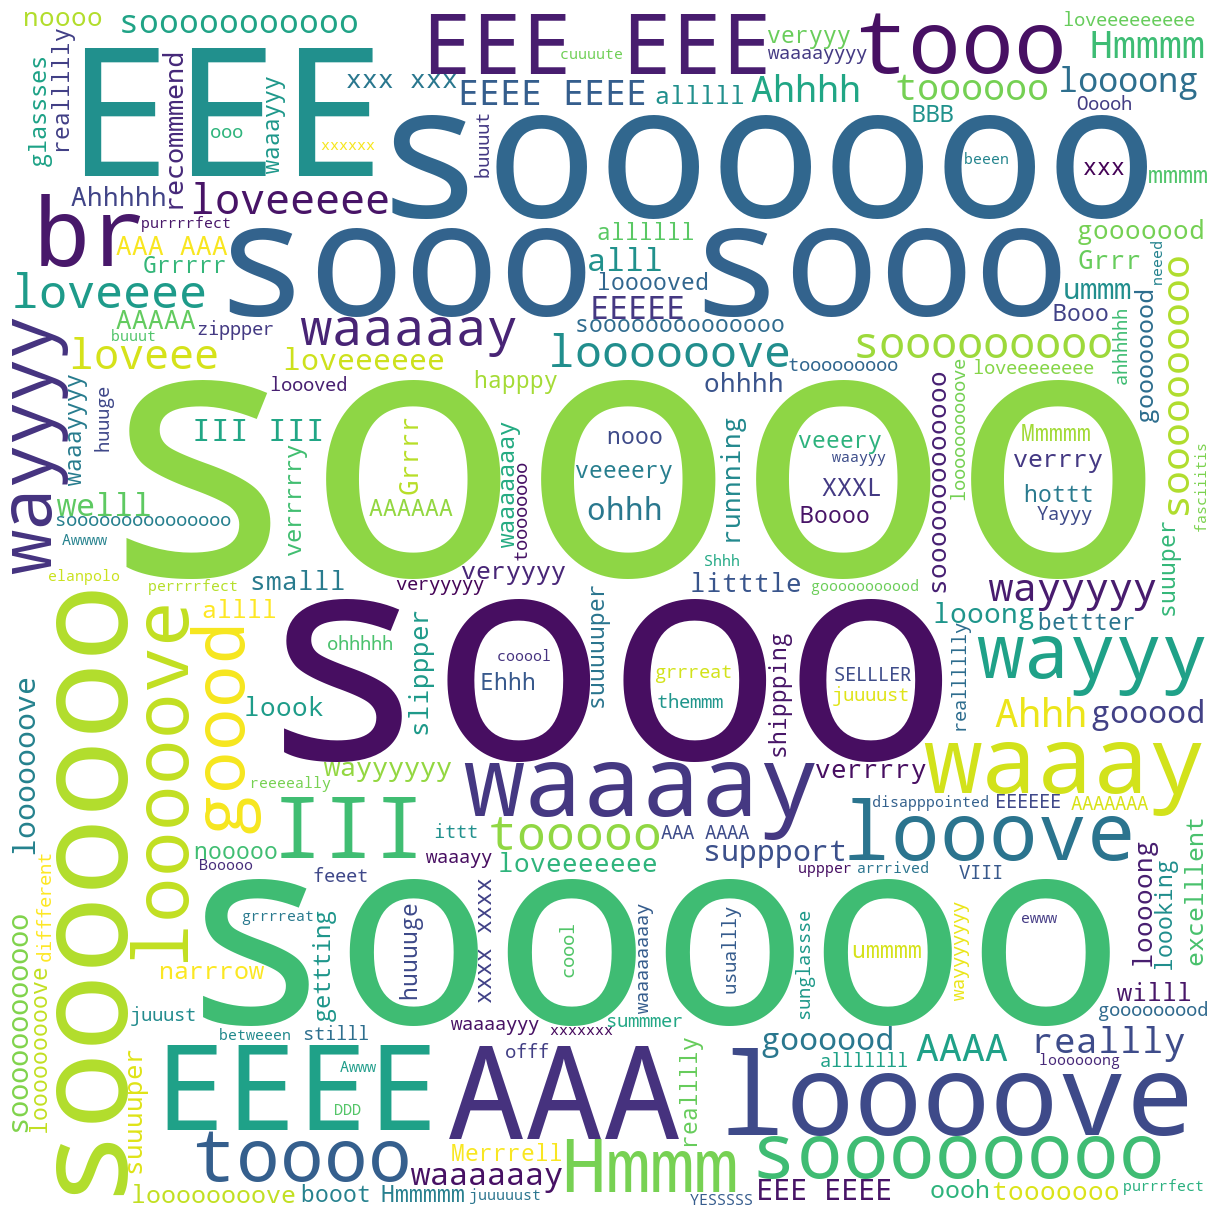

In [40]:
show_word_cloud(data, "review_body")